### Machine Learning Model Building Task

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
filepath = r"C:\Users\kinne\Desktop\Datasets\phishing_data.csv"

In [3]:
df = pd.read_csv(filepath)

### Data Exploration 

Basic data exploration provides some fundamental information such as structure of the data, shape of the dataframe, data types of columns and count of missing values.It also suggests that the data is clean, that is, there are no missing values and all the categorical variables are already encoded. The value count of the target variable shows that the classes are balanced, that is, there is no class imbalance. This is helpful in selecting preliminary evaluation methods. For example, suppose classes are imbalanced and 99% of the websites are not phishing then a model which classifies every website as phishing has a 99% accuracy score but it will not serve our purpose. Hence, accuracy score is not a suitable metric. However, this is not the case here so accuracy score can be used as an evaluation metric for preliminary model evaluation. 

In [4]:
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,1,0,0,1,-1,-1,-1,0,0,...,0,0,-1,1,-1,-1,0,1,1,1
1,0,1,0,0,0,-1,0,1,0,0,...,0,0,-1,1,0,-1,0,1,0,1
2,0,0,0,0,0,-1,-1,-1,0,0,...,0,0,0,1,1,-1,0,0,1,1
3,0,0,0,0,0,-1,-1,-1,1,0,...,0,0,-1,1,1,-1,0,-1,0,1
4,0,0,1,0,0,-1,1,1,0,0,...,1,0,-1,1,0,-1,0,1,0,0


In [5]:
df.shape

(2456, 31)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2456 entries, 0 to 2455
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            2456 non-null   int64
 1   URL_Length                   2456 non-null   int64
 2   Shortining_Service           2456 non-null   int64
 3   having_At_Symbol             2456 non-null   int64
 4   double_slash_redirecting     2456 non-null   int64
 5   Prefix_Suffix                2456 non-null   int64
 6   having_Sub_Domain            2456 non-null   int64
 7   SSLfinal_State               2456 non-null   int64
 8   Domain_registeration_length  2456 non-null   int64
 9   Favicon                      2456 non-null   int64
 10  port                         2456 non-null   int64
 11  HTTPS_token                  2456 non-null   int64
 12  Request_URL                  2456 non-null   int64
 13  URL_of_Anchor                2456 non-null   int

In [7]:
df.isna().sum()

having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

In [8]:
df['Result'].value_counts()

0    1362
1    1094
Name: Result, dtype: int64

In [9]:
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [10]:
X = df.drop('Result', axis=1).values
y = df['Result'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=21)

In [11]:
X_train.shape

(1719, 30)

In [12]:
y_train.shape

(1719,)

### Model Development

A set of classification models are developed - Logistic Regression model, Support Vector Machine Model, Decision Tree Model and KNN model. The accuracy of each model is evaluated on the validation set using cross validation. A boxplot is generated to visualize the results. It is observed that the Support Vector machine model performs the best with a median accuracy of 95.81%, the median is chosen as it is less affected by the outliers. The Decision Tree classifier is close second.

The test data is unused until the final model is selected and the final model is validated on this test data which is totally unseen. For model evaluation to select the best model a validation dataset is created from the training data itself using the cross validation technique. This is done to prevent data leakage and get a fair validation of the model by evaluating it on totally unseen data. 

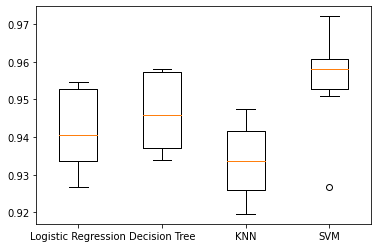

In [13]:
models = {"Logistic Regression": LogisticRegression(),
          "Decision Tree": DecisionTreeClassifier(),
          "KNN": KNeighborsClassifier(),
          "SVM": SVC()}

results = []

for model in models.values():
    kf = KFold(n_splits=6, random_state=21, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kf)
    results.append(cv_results)
    
plt.boxplot(results, labels = models.keys())
plt.show()

In [14]:
SVM_mean_accuracy = results[3].mean()
SVM_median_accuracy = np.median(results[3])
print(SVM_mean_accuracy)
print(SVM_median_accuracy)

0.9546287046287046
0.9581150556760313


### Ensemble Learning

An ensemble learning model is developed which is basically a combination of all the individual classification models to check if it gives better performance as the ensemble learning classifier overcomes the variance of the individual models and uses majority voting to arrive at a prediction. However, there is no significant improvement in model performance.

In [15]:
from sklearn.ensemble import VotingClassifier

logreg = LogisticRegression()
KNN = KNeighborsClassifier()
dtree = DecisionTreeClassifier()
svm = SVC()

classifiers = [('Logistic Regression', logreg),('Decision Tree', dtree),('KNN', KNN),('SVM', svm)]

vc = VotingClassifier(estimators=classifiers)

kf = KFold(n_splits=6, random_state=21, shuffle=True)
cv_results = cross_val_score(vc, X_train, y_train, cv=kf)

mean_accuracy = cv_results.mean()
median_accuracy = np.median(cv_results)

In [16]:
print("Mean Ensemble Accuracy:{}".format(mean_accuracy))
print("Median Ensemble Accuracy:{}".format(median_accuracy))

Mean Ensemble Accuracy:0.9592825873313678
Median Ensemble Accuracy:0.9616176506420409


### Bagging Classifier - SVM 

Bagging is used to develop a bagging classifier with SVM as the base estimator. Bagging is the machine learning techniques in which multiple machine learning models are trained on different subsets of the training data to overcome overfitting, improve the model performance by reducing variance and combine predictions from multiple models. However, in this case too there is no  significant improvement in the model performance.


In [17]:
from sklearn.ensemble import BaggingClassifier 

bc = BaggingClassifier(base_estimator=svm, n_estimators=300, n_jobs=-1, random_state=21)

kf = KFold(n_splits=6, random_state=21, shuffle=True)
cv_results = cross_val_score(bc, X_train, y_train, cv=kf)

mean_accuracy = cv_results.mean()
median_accuracy = np.median(cv_results)

In [18]:
print("Mean Ensemble Accuracy:{}".format(mean_accuracy))
print("Median Ensemble Accuracy:{}".format(median_accuracy))

Mean Ensemble Accuracy:0.9528885748397943
Median Ensemble Accuracy:0.9563789868667918


### Random Forest Classification 

A random Forest model is developed and evaluated. The Random Forest is an extension of bagging which randomizes the features used in each training subset and has decision trees as base learners. It reduces the tendency of decision trees to overfit training data by utilizing the concept of bagging and randomization. The accuracy is slightly better at 96.68%.

In [19]:
from sklearn.ensemble import RandomForestClassifier 

rf = RandomForestClassifier(n_estimators=300, random_state=21)

kf = KFold(n_splits=6, random_state=21, shuffle=True)
cv_results = cross_val_score(rf, X_train, y_train, cv=kf)

mean_accuracy = cv_results.mean()
median_accuracy = np.median(cv_results)

In [20]:
print("Mean Ensemble Accuracy:{}".format(mean_accuracy))
print("Median Ensemble Accuracy:{}".format(median_accuracy))

Mean Ensemble Accuracy:0.9668380400087716
Median Ensemble Accuracy:0.9668989547038327


### Gradient Boosting with XGBoost

Finally, XGBoost is used to develop a gradient boosted model. Gradient Boosting aims to improve the model performance by training multiple machine learning models sequentially where each model learns from the mistakes of its predecessors. In general, decision trees are used as a base learner. However, it is observed that the model performance is marginally lower than the Random Forest classifier.


In [21]:
import xgboost as xgb

xg_classifier = xgb.XGBClassifier(n_estimators=500, seed=21)

f = KFold(n_splits=6, random_state=21, shuffle=True)
cv_results = cross_val_score(xg_classifier, X_train, y_train, cv=kf)

mean_accuracy = cv_results.mean()
median_accuracy = np.median(cv_results)

In [22]:
print("Mean Ensemble Accuracy:{}".format(mean_accuracy))
print("Median Ensemble Accuracy:{}".format(median_accuracy))

Mean Ensemble Accuracy:0.9604419970273629
Median Ensemble Accuracy:0.9615993762335225


### Model Validation

Both the Gradient Boosted Classifier and the Random Forest Classifier are validated on the test set, which is totally unseen new data, where it is observed that the Random Forest Classifier (97.28%) significantly performs better than the Gradient Boosted Classifier (96.47%). It is observed that the hyper-tuning of parameters of the Random Forest classifier with grid search does not significantly increase the model performance and it is computationally expensive, hence not essential in this case. 

A detailed evaluation of the Random Forest Classifier is done on the test set. As this is a binary classification task the area under the ROC curve, confusion matrix and a classification report is obtained.

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
xg_classifier.fit(X_train, y_train)
y_pred = xg_classifier.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.9647218453188603


In [25]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.9728629579375848


#### Confusion Matrix

A confusion matrix is plotted and a classification report is generated which shows various model evaluation metrics such as precision, recall and F1-score. A confusion matric gives a detailed report on model performance with true positives, true negatives, false positives and false negatives. It provides a holistic view of the model perofrmance. 

C:\ANACONDA\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


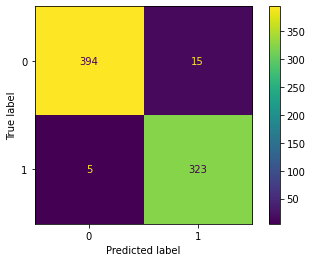

In [26]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(rf, X_test, y_test)
plt.show()

#### Classification Report 

In [29]:
from sklearn.metrics import classification_report

y_pred_probs = rf.predict_proba(X_test)[:, 1]

# Calculate the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       409
           1       0.96      0.98      0.97       328

    accuracy                           0.97       737
   macro avg       0.97      0.97      0.97       737
weighted avg       0.97      0.97      0.97       737



#### Area under the ROC Curve

The area under the ROC curve is basically the measure of the correct predictions for positive class. The ROC curve shows model performance at every classification threshold and it pltos True positive rate and false positive rate. The area under the ROC curve 0.9946 which is very close to the desired value of 1.

In [30]:
from sklearn.metrics import roc_auc_score

# Predict probabilities
y_pred_probs = rf.predict_proba(X_test)[:, 1]

# Calculate roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

0.9946254994334784


## Conclusion

**All the evaluation metrics suggest that the model is reasonably accurate and can generate good predictions. Hence, in conclusion the Random Forest Classifier is recommended as the best model for this classification task.**
